<a href="https://colab.research.google.com/github/avineet4/-Heart-Failure-Prediction-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **HEART PREDICTION COMPARISON **

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# reading data
url= "https://raw.githubusercontent.com/Abhijat-M/data/main/heart_failure_clinical_records_dataset%20(1).csv"
data = pd.read_csv(url)

In [ ]:
data.head()
data.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
# Checking if data set contains empty value
data.isna().values.any()

False

In [ ]:
# Checking if data set contains inf value
np.isinf(data).values.any()

False

<Axes: >

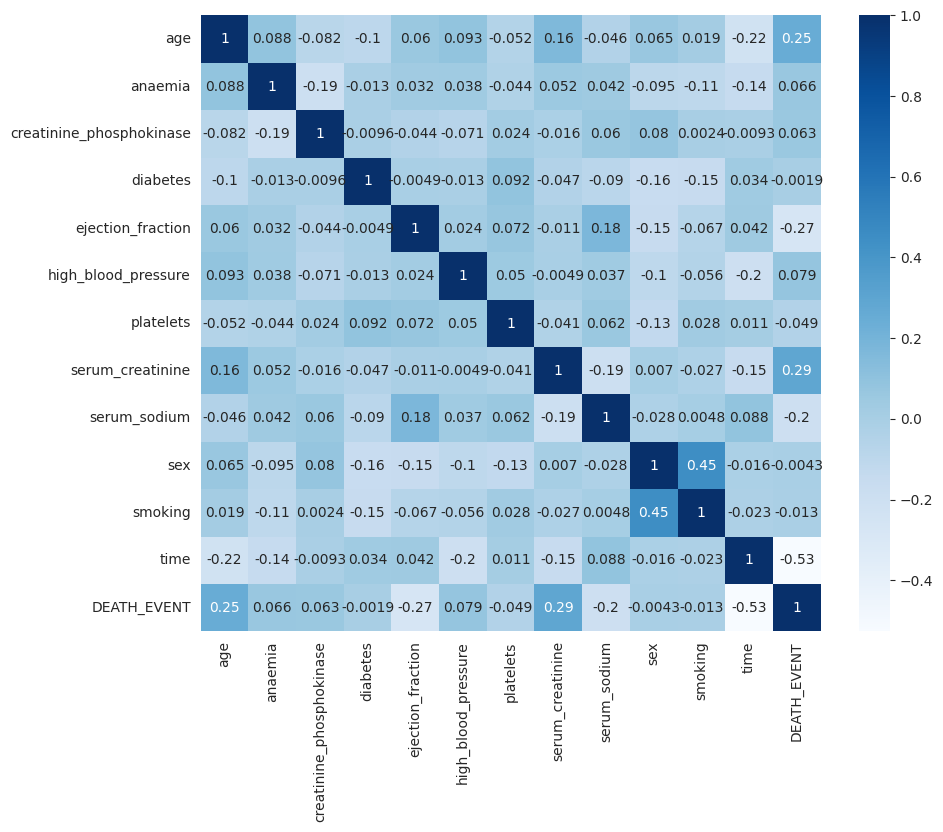

In [ ]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

In [ ]:
import plotly.graph_objs as go
labels = ['Death','Survived']
died_yes = data[data['DEATH_EVENT']==1]
died_no = data[data['DEATH_EVENT']==0]
values = [len(died_no), len(died_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Death ratio")
fig.show()

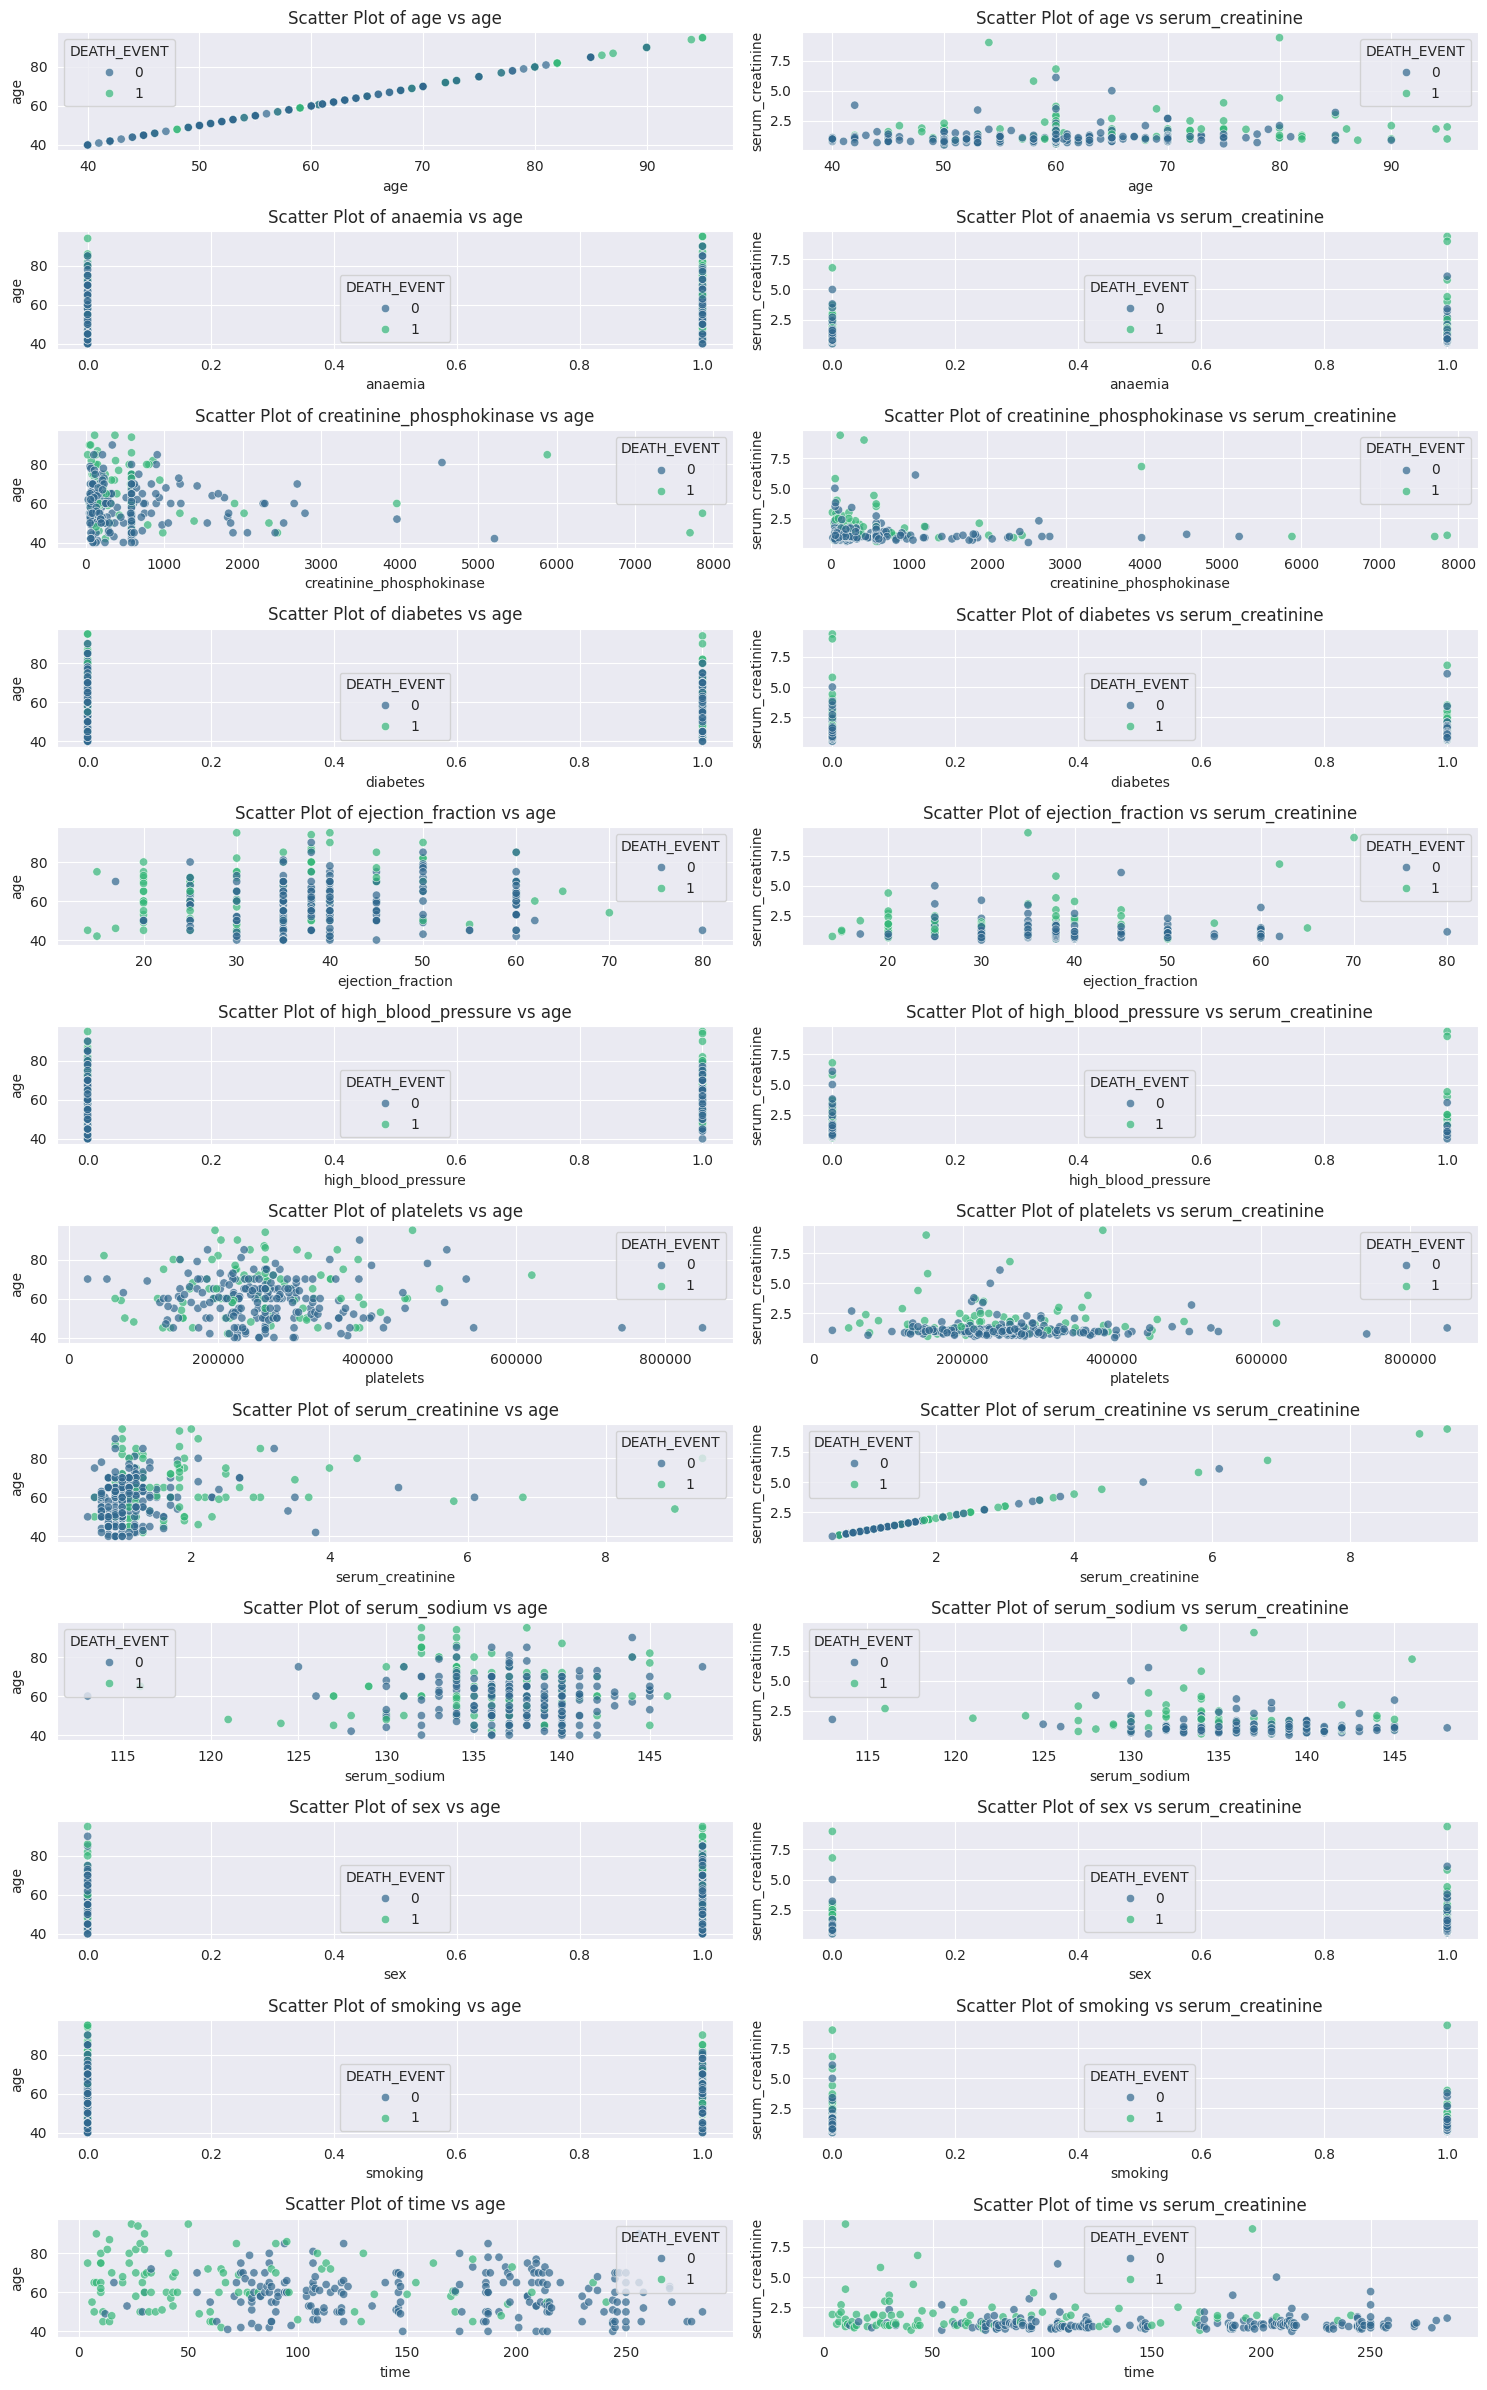

In [ ]:
selected_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
# Set up subplots
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(15, 2 * len(selected_features)))
# Plot scatter plots for each feature against 'DEATH_EVENT'
for i, feature in enumerate(selected_features):
    # Scatter plot for feature vs 'DEATH_EVENT' (0)
    sns.scatterplot(x=feature, y='age', hue='DEATH_EVENT', data=data, ax=axes[i, 0], palette='viridis',
    alpha=0.7)
    axes[i, 0].set_title(f'Scatter Plot of {feature} vs age')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('age')
    # Scatter plot for feature vs 'DEATH_EVENT' (1)
    sns.scatterplot(x=feature, y='serum_creatinine', hue='DEATH_EVENT', data=data, ax=axes[i, 1],
    palette='viridis', alpha=0.7)
    axes[i, 1].set_title(f'Scatter Plot of {feature} vs serum_creatinine')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('serum_creatinine')

# Adjust layout
plt.tight_layout()
plt.show()

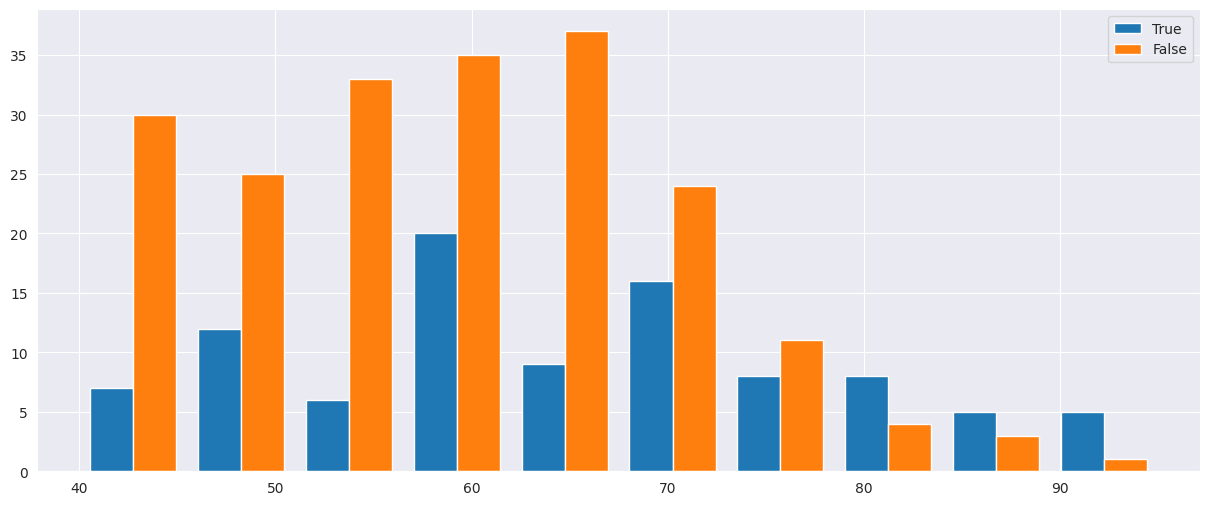

In [ ]:
# Checking at which age the death event most often occurs

death_events = data.DEATH_EVENT.unique()
plt.hist([data.loc [data.DEATH_EVENT == e, 'age'] for e in death_events])
plt.legend(death_events.astype('bool'))

<ipython-input-54-d775d9920db9>:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

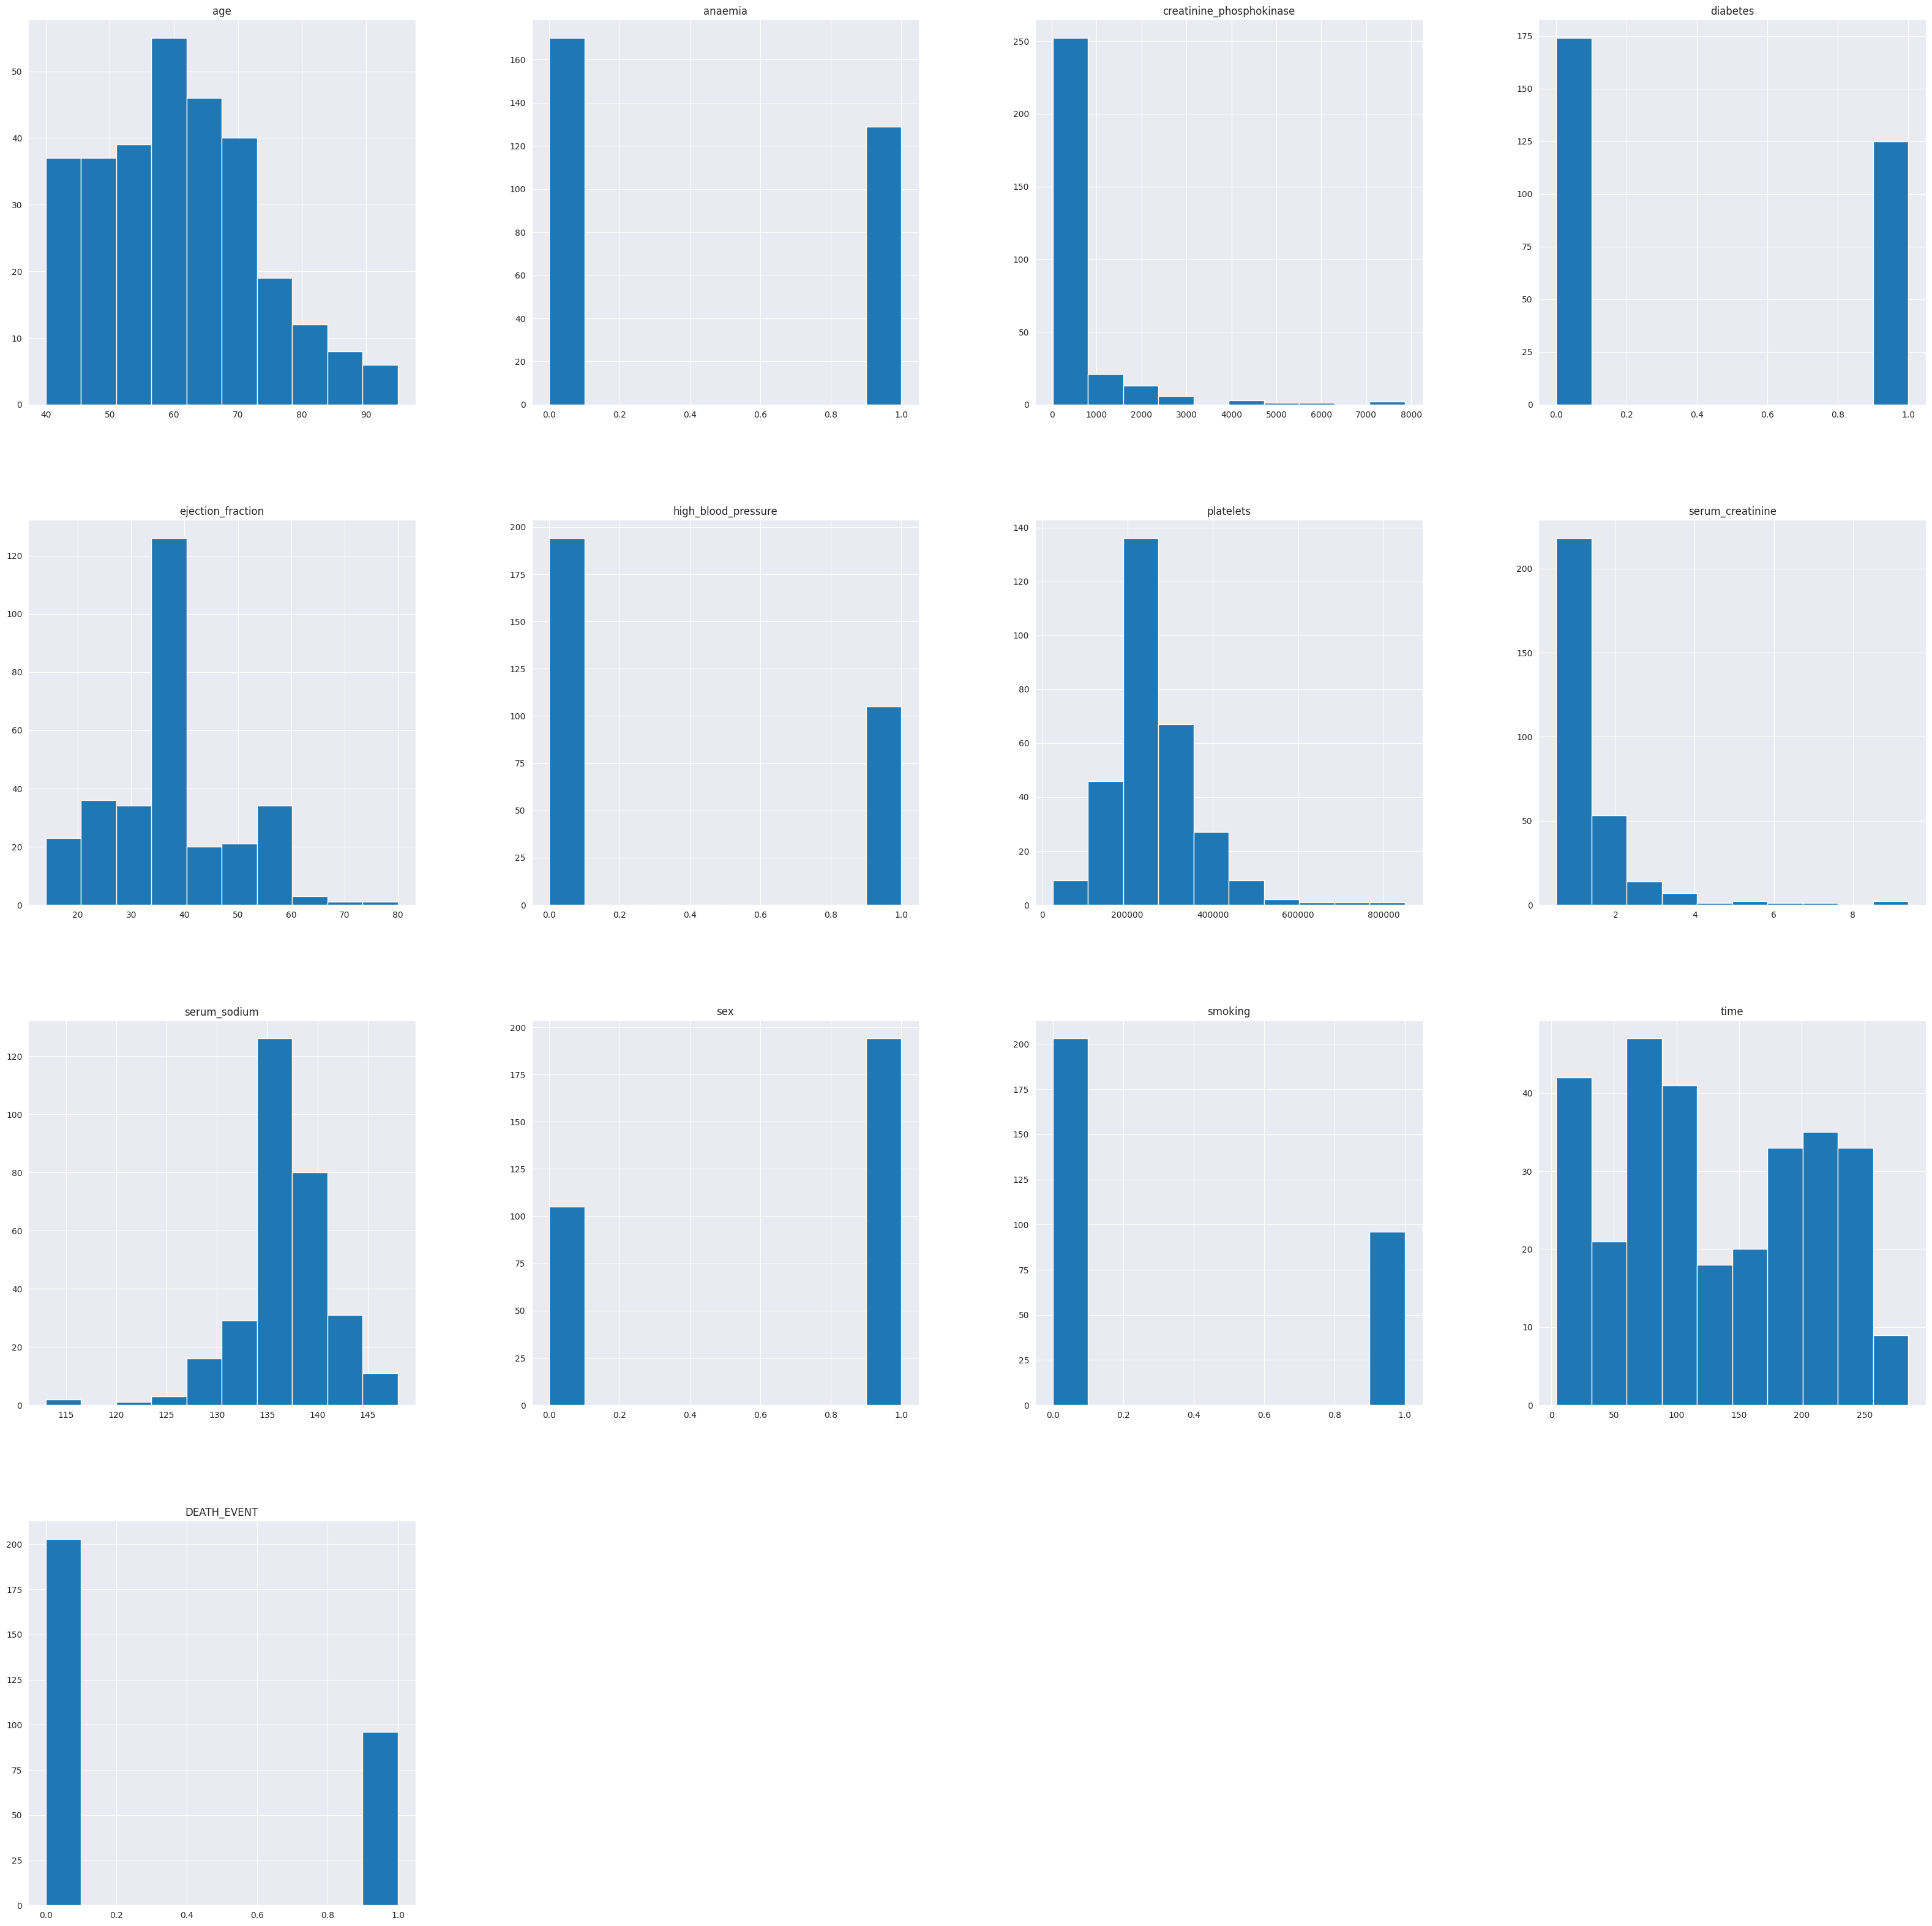

In [ ]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
data.hist(ax = ax)

**SPLIT** **DATA**

In [ ]:
# Spliting data
x = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [ ]:
#Checking if shapes of x and y are correct
data.shape, x.shape, y.shape

((299, 13), (299, 12), (299,))

In [ ]:
#Spliting between training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**DEEP LEARNING MODEL**

In [ ]:
# Preparing a model

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [ ]:
model = Sequential([
    BatchNormalization(),
    Dense(12, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                   batch_size=16, epochs = 50,
                   validation_data=(x_test, y_test),
                   verbose=2)

Epoch 1/50
15/15 - 2s - loss: 0.7595 - accuracy: 0.4393 - val_loss: 0.7373 - val_accuracy: 0.4667 - 2s/epoch - 108ms/step
Epoch 2/50
15/15 - 0s - loss: 0.7108 - accuracy: 0.5356 - val_loss: 0.7084 - val_accuracy: 0.5667 - 65ms/epoch - 4ms/step
Epoch 3/50
15/15 - 0s - loss: 0.6454 - accuracy: 0.6234 - val_loss: 0.6951 - val_accuracy: 0.5667 - 72ms/epoch - 5ms/step
Epoch 4/50
15/15 - 0s - loss: 0.6445 - accuracy: 0.6695 - val_loss: 0.6878 - val_accuracy: 0.5833 - 66ms/epoch - 4ms/step
Epoch 5/50
15/15 - 0s - loss: 0.6352 - accuracy: 0.6611 - val_loss: 0.6828 - val_accuracy: 0.6167 - 65ms/epoch - 4ms/step
Epoch 6/50
15/15 - 0s - loss: 0.6088 - accuracy: 0.6862 - val_loss: 0.6758 - val_accuracy: 0.6167 - 72ms/epoch - 5ms/step
Epoch 7/50
15/15 - 0s - loss: 0.5943 - accuracy: 0.6946 - val_loss: 0.6690 - val_accuracy: 0.6167 - 74ms/epoch - 5ms/step
Epoch 8/50
15/15 - 0s - loss: 0.5990 - accuracy: 0.6946 - val_loss: 0.6625 - val_accuracy: 0.6167 - 66ms/epoch - 4ms/step
Epoch 9/50
15/15 - 0s - 

In [ ]:
model.evaluate(x_test, y_test, batch_size=16)

4/4 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8500


[0.38232937455177307, 0.8500000238418579]

Text(0.5, 1.0, 'loss function')

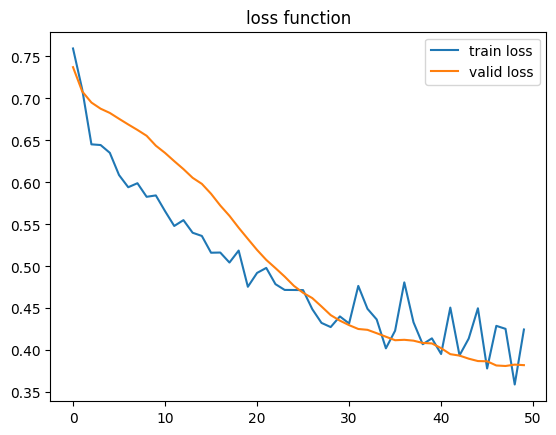

In [ ]:
# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.title('loss function')

Text(0.5, 1.0, 'Accuracy')

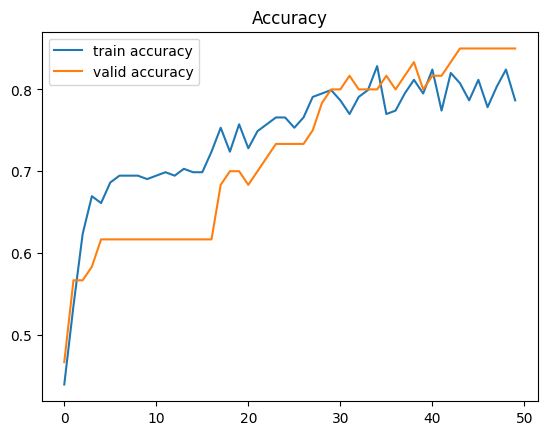

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.legend()
plt.title('Accuracy')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Metrics for testing data
accuracy_list=[]
y_pred = model.predict(x_test)
y_pred_rounded = np.round(y_pred).astype('int32')

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)
accuracy_list.append(accuracy)
print("DEEP LEARNING MODEL")
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

2/2 [==============================] - 0s 8ms/step
DEEP LEARNING MODEL
Accuracy: 85.0 %
Precision: 93.75 %
Recall: 93.75 %


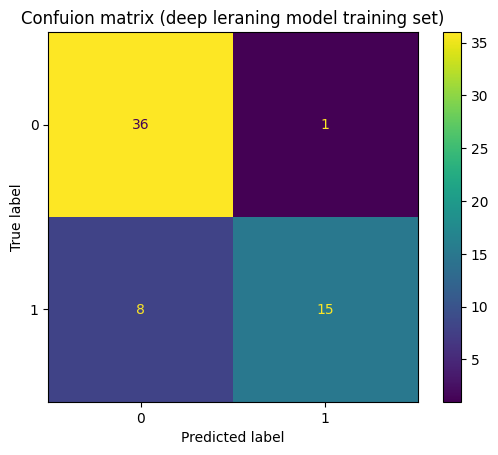

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_disp.plot()
plt.title('Confuion matrix (deep leraning model training set)')
plt.show()

**XG BOOST**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


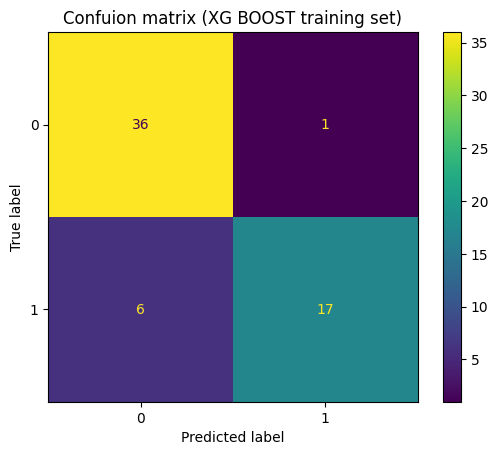

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (XG BOOST training set)')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 88.33333333333333 %
Precision: 94.44444444444444 %
Recall: 94.44444444444444 %


In [ ]:
print("XG BOOST")
print(classification_report(y_test,y_pred))

XG BOOST
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.94      0.74      0.83        23

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60



**Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

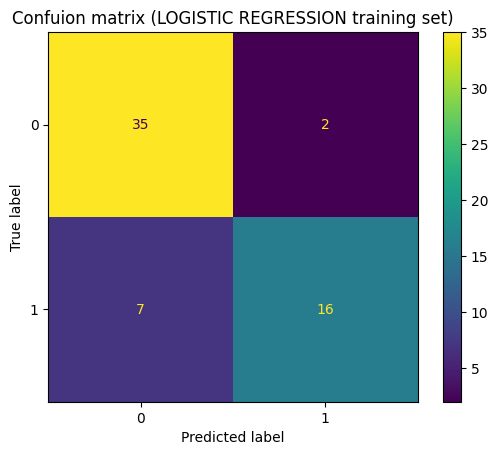

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (LOGISTIC REGRESSION training set)')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 85.0 %
Precision: 88.88888888888889 %
Recall: 88.88888888888889 %


In [ ]:
print("LOGISTIC REGRESSION")
print(classification_report(y_test,y_pred))

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [ ]:
y_predd = classifier.predict(x_test)
y_predd

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

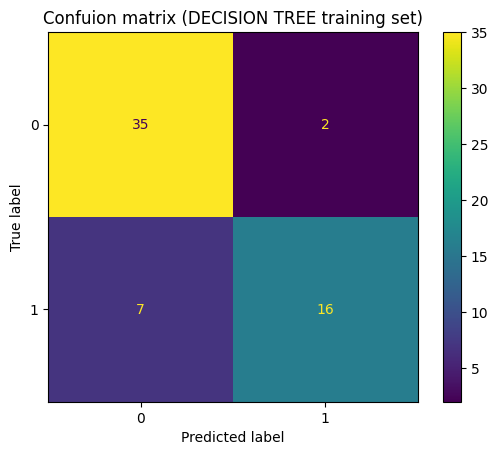

In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
conf_disp.plot()
plt.title('Confuion matrix (DECISION TREE training set)')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy_list.append(accuracy)
print(f"Accuracy: {accuracy*100} %")
print(f"Precision: {precision*100} %")
print(f"Recall: {precision*100} %")

Accuracy: 85.0 %
Precision: 88.88888888888889 %
Recall: 88.88888888888889 %


In [ ]:
print("DECISION TREE")
print(classification_report(y_test,y_pred))

DECISION TREE
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
name_list = ["Deep Learning", "XG BOOST", "Logestic Regression", "DecisionTree"]
print(name_list)
print(accuracy_list)

['Deep Learning', 'XG BOOST', 'Logestic Regression', 'DecisionTree']
[0.85, 0.8833333333333333, 0.85, 0.85]


<ipython-input-41-0e10ac7a5d58>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




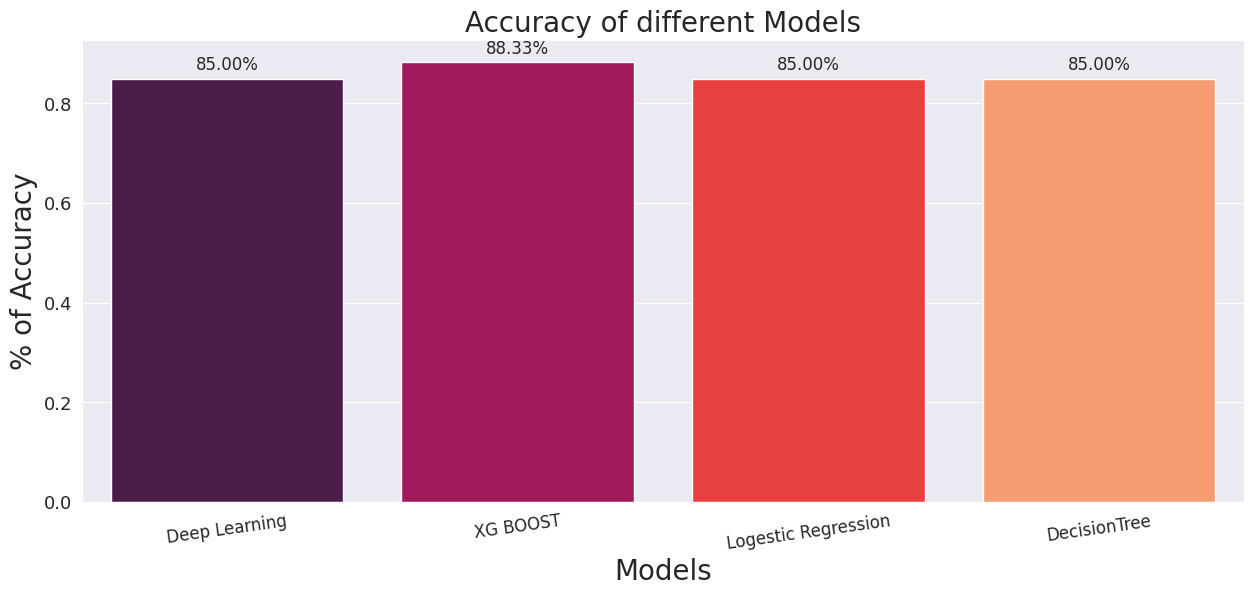

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=name_list, y=accuracy_list, palette= "rocket", saturation=1)
plt.xlabel("Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
plt.show()